In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the movie data from the CSV file

In [3]:
movies_df = pd.read_csv('/content/drive/MyDrive/IMDb Movies India.csv', encoding='ISO-8859-1')

In [4]:
# Display basic information about the dataset

In [5]:
print(movies_df.head())

                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [6]:
print(movies_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB
None


In [7]:
print(movies_df.describe())

            Rating
count  7919.000000
mean      5.841621
std       1.381777
min       1.100000
25%       4.900000
50%       6.000000
75%       6.800000
max      10.000000


In [8]:
# Display column names

In [9]:
columns_list = movies_df.columns
print(columns_list)

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


In [11]:
# Check for missing values

In [10]:
missing_values = movies_df.isnull().sum()
print(missing_values)

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64


In [12]:
# Display the shape of the dataset

In [13]:
dataset_shape = movies_df.shape
print(f"Number of rows: {dataset_shape[0]}, Number of columns: {dataset_shape[1]}")

Number of rows: 15509, Number of columns: 10


In [16]:
# Explore the distribution of ratings

In [21]:
rating_distribution = movies_df['Rating'].value_counts()
print("Rating Distribution: ", rating_distribution)

Rating Distribution:  6.2     269
6.8     264
6.5     254
6.6     239
6.7     227
       ... 
9.6       1
1.4       1
9.7       1
10.0      1
1.1       1
Name: Rating, Length: 84, dtype: int64


In [22]:
# Drop duplicates and handle missing values for selected attributes

In [23]:
movies_df.drop_duplicates(inplace=True)
selected_attributes = ['Name', 'Year', 'Duration', 'Votes', 'Rating']
movies_df.dropna(subset=selected_attributes, inplace=True)

In [24]:
# Display missing values after handling them

In [25]:
missing_values_after_cleanup = movies_df.isna().sum()
print(missing_values_after_cleanup)

Name          0
Year          0
Duration      0
Genre        31
Rating        0
Votes         0
Director      1
Actor 1      75
Actor 2     117
Actor 3     163
dtype: int64


In [26]:
# Select relevant columns for further analysis

In [27]:
selected_movies_info = movies_df[['Name', 'Rating']]
print(selected_movies_info.head())

                                 Name  Rating
1  #Gadhvi (He thought he was Gandhi)     7.0
3                             #Yaaram     4.4
5                ...Aur Pyaar Ho Gaya     4.7
6                           ...Yahaan     7.4
8                  ?: A Question Mark     5.6


In [33]:
#Data Visualization

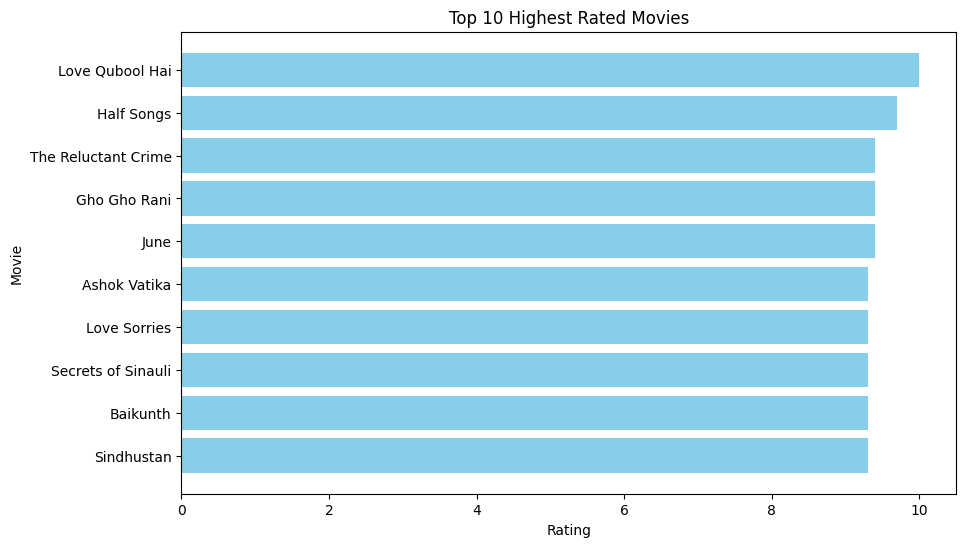

In [34]:
top_rated_movies = movies_df.sort_values(by='Rating', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_rated_movies['Name'], top_rated_movies['Rating'], color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Movie')
plt.title("Top 10 Highest Rated Movies")
plt.gca().invert_yaxis()
plt.show()

In [35]:
# Scatter plot of Rating vs Votes

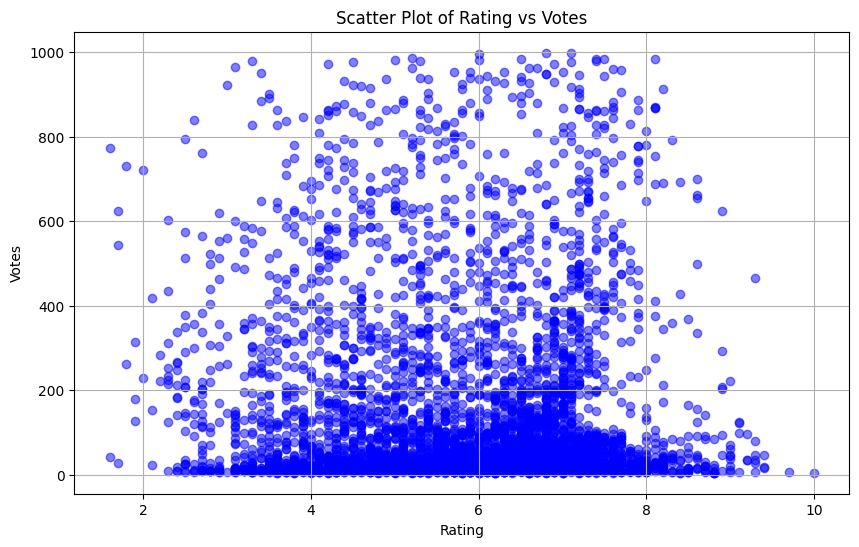

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(movies_df['Rating'], movies_df['Votes'], alpha=0.5, color='b')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title('Scatter Plot of Rating vs Votes')
plt.grid(True)
plt.show()

In [37]:
# Bar plot of the top actors by the number of movies performed

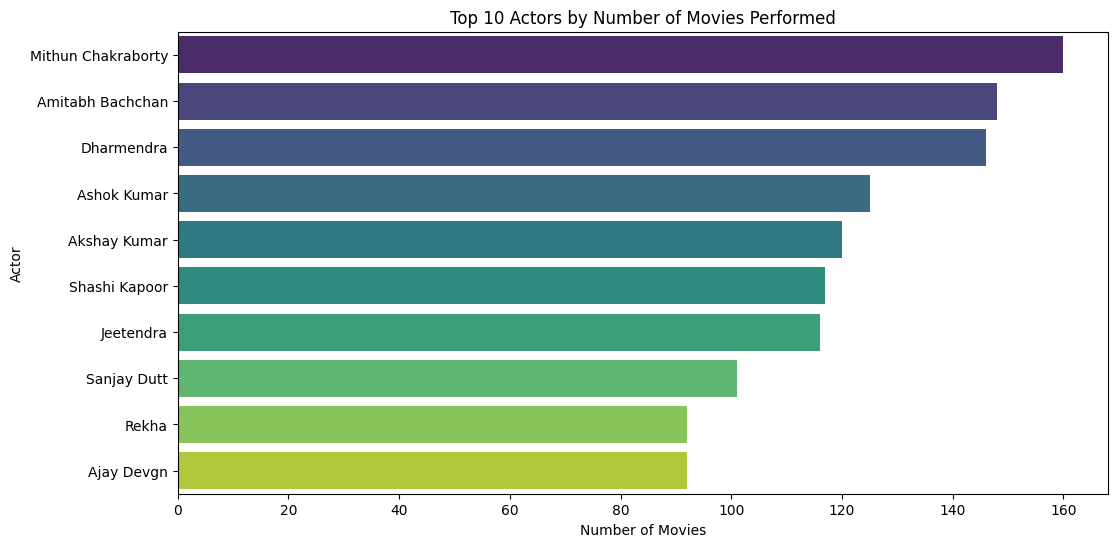

In [38]:
actors = pd.concat([movies_df['Actor 1'], movies_df['Actor 2'], movies_df['Actor 3']])
actor_counts = actors.value_counts().reset_index()
actor_counts.columns = ['Actor', 'Number of Movies']
plt.figure(figsize=(12, 6))
sns.barplot(x='Number of Movies', y='Actor', data=actor_counts.head(10), palette='viridis')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')
plt.title('Top 10 Actors by Number of Movies Performed')
plt.show()

In [39]:
#Pair Plot and Correlation Matrix

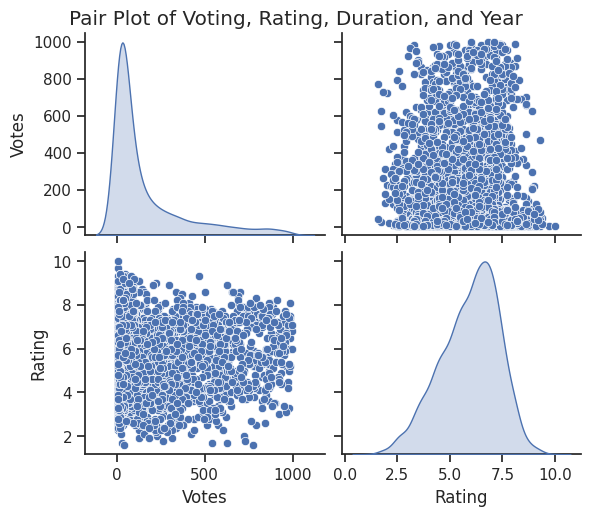

In [40]:
columns_of_interest = ['Votes', 'Rating', 'Duration', 'Year']
sns.set(style='ticks')
sns.pairplot(movies_df[columns_of_interest], diag_kind='kde', markers='o', palette='viridis', height=2.5, aspect=1.2)
plt.suptitle('Pair Plot of Voting, Rating, Duration, and Year', y=1.02)
plt.show()

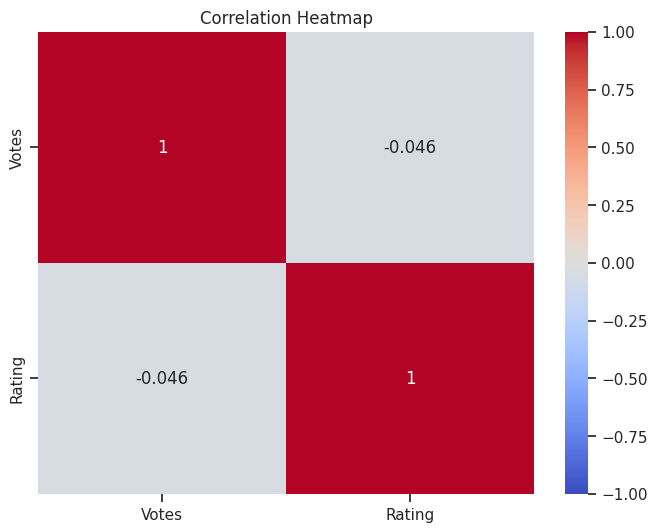

In [41]:
numerical_columns = ['Votes', 'Rating', 'Duration', 'Year']
correlation_matrix = movies_df[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Heatmap")
plt.show()


In [42]:
#Data Preprocessing

In [43]:
movies_df['Votes'] = pd.to_numeric(movies_df['Votes'], errors='coerce')
movies_df['Year'] = movies_df['Year'].astype(str)
movies_df['Duration'] = movies_df['Duration'].astype(str)
movies_df['Year'] = movies_df['Year'].str.extract('(\d+)').astype(float)
movies_df['Duration'] = movies_df['Duration'].str.extract('(\d+)').astype(float)

In [44]:
#Linear Regression Model

In [50]:
movies_df = movies_df.dropna(subset = ['Votes'])
movies_df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997.0,147.0,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
8,?: A Question Mark,2012.0,82.0,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,2014.0,116.0,"Action, Crime, Thriller",4.0,11.0,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [54]:
features = movies_df[['Year', 'Duration', 'Votes']]
target = movies_df['Rating']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)

LinearRegression()

In [52]:
#Model Evaluation

In [55]:
y_pred = linear_regression_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared (R2) Score: {r2}')

Mean Absolute Error: 1.084831138760136
Root Mean Squared Error: 1.3484226346477919
R-squared (R2) Score: 0.098121638402908


In [56]:
# Visualizing Model Performance

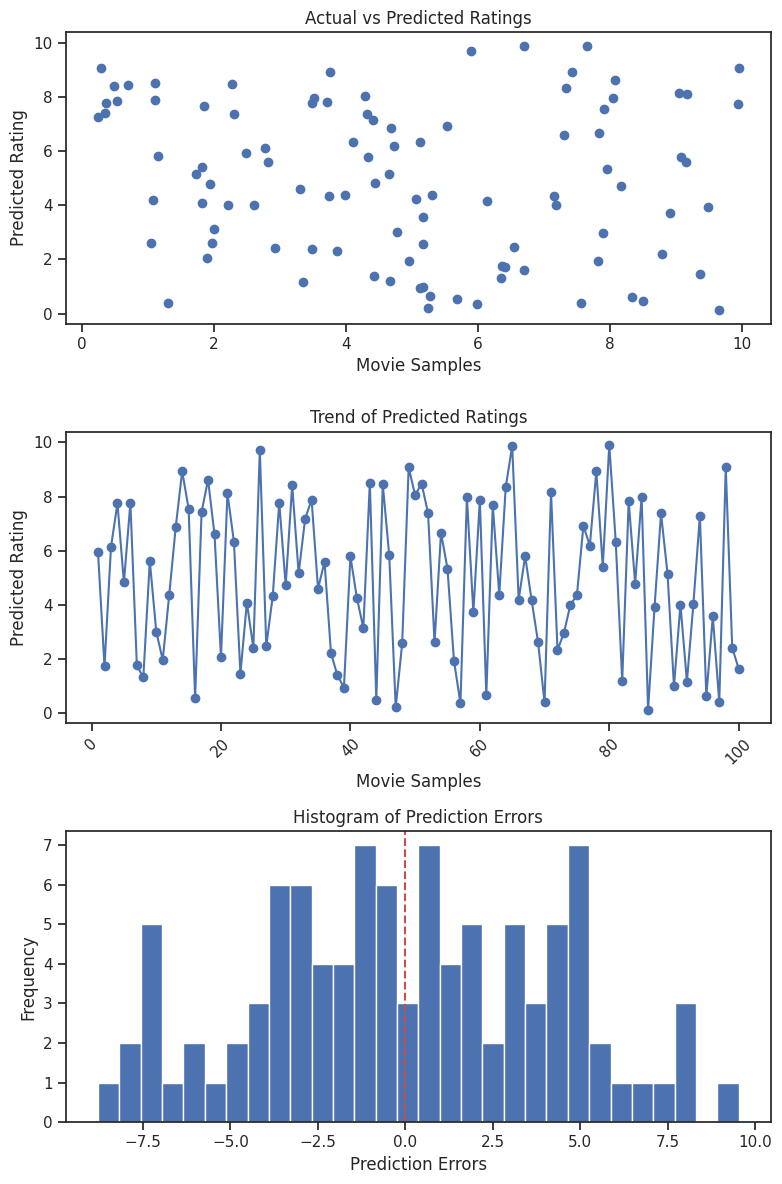

In [58]:
y_test_samples = np.random.rand(100) * 10
y_pred_samples = np.random.rand(100) * 10
prediction_errors = y_test_samples - y_pred_samples
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

axs[0].scatter(y_test_samples, y_pred_samples)
axs[0].set_xlabel("Movie Samples")
axs[0].set_ylabel("Predicted Rating")
axs[0].set_title("Actual vs Predicted Ratings")

movie_samples_range = np.arange(1, len(y_pred_samples) + 1)
axs[1].plot(movie_samples_range, y_pred_samples, marker='o', linestyle='-')
axs[1].set_xlabel("Movie Samples")
axs[1].set_ylabel("Predicted Rating")
axs[1].set_title("Trend of Predicted Ratings")
axs[1].tick_params(axis='x', rotation=45)

axs[2].hist(prediction_errors, bins=30)
axs[2].set_xlabel("Prediction Errors")
axs[2].set_ylabel("Frequency")
axs[2].set_title("Histogram of Prediction Errors")
axs[2].axvline(x=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()